In [9]:
# Nama: Erik Saputra Rifki
# NPM: 24083010069

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NPM= 69
np.random.seed(NPM)

makan =  pd.read_csv("makanan.csv")

# handling missing values
harga_rata = makan['harga'].mean()
makan['harga'] = makan['harga'].fillna(harga_rata)

budget= 1e6 #rupiah

wkenyang_base= 0.8
wrasa_base= 0.7
wsehat_base= 0.9 # simpangan lebih besar
wbosan_base= 0.2

skor_kumulatif= 0.0
SAMPLE_NUM= 500

sampleid= np.arange(0, 500)
# skor perorangan
skor= np.zeros(SAMPLE_NUM, dtype=np.double)
sisa= np.zeros(SAMPLE_NUM, dtype=np.double)
sehat= np.zeros(SAMPLE_NUM, dtype=np.double)
pilihankum= np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM= 150e3
SISA_MAKSIMUM= 300e3
bin_sisa= np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat= np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih= np.zeros((SAMPLE_NUM, 62), dtype=np.double)

for n in range(0, SAMPLE_NUM):
    budget=1e6
    skor_kumulatif= 0
    skor_sehat= 0

    for i in range(0, 31): # hari
        # makan pertama, pilih secara acak
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        resp_pilih[n][2*i]= pilihan

        # makan kedua
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        resp_pilih[n][2*i+1]= pilihan

    sisa[n]= budget
    skor[n]= skor_kumulatif
    sehat[n]= skor_sehat

    resp_sehat[n][ int((budget-SISA_MININUM)/1000)]= skor_sehat

In [2]:
# (1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif
idx_sehat = np.where(sehat > 0)[0]
print("1. Simulasi dengan skor sehat positif:")
print(idx_sehat)

1. Simulasi dengan skor sehat positif:
[  0   1   3   4   5   6   7   8   9  11  12  15  16  17  19  21  22  23
  24  25  26  27  28  29  30  32  33  34  36  37  39  40  41  42  43  45
  46  47  48  49  50  51  52  53  55  56  57  58  61  62  63  64  65  66
  67  68  69  70  72  74  75  77  78  79  80  82  83  84  85  86  88  89
  90  91  92  93  94  96  98 101 102 103 104 106 107 109 110 112 113 114
 115 116 117 118 120 121 122 123 125 126 127 129 130 131 132 133 134 135
 137 138 139 140 141 142 143 145 146 147 148 149 150 151 152 153 154 156
 157 158 159 160 161 162 163 164 165 166 168 169 171 172 173 174 175 176
 178 179 180 181 182 184 185 186 187 189 190 191 192 193 194 195 196 197
 198 199 202 203 205 206 207 209 210 211 212 214 215 216 217 218 219 220
 221 222 223 225 227 228 229 230 231 232 233 235 236 237 239 240 242 243
 244 245 246 247 248 249 250 251 254 256 257 258 259 260 261 262 263 264
 265 266 267 270 272 274 275 276 277 278 283 285 286 287 288 289 290 292
 293 294 296

Dari 500 simulasi pola makan selama 31 hari, sebagian besar (mayoritas besar) menghasilkan skor kesehatan positif, menandakan bahwa secara keseluruhan model ini cenderung mendorong pilihan makanan yang lebih sehat daripada tidak sehat.

In [3]:
# (2) cari titik-titik dengan sisa uang bulanan positif dari (1)
idx_sehat_sisa = idx_sehat[sisa[idx_sehat] > 0]
print("2. Simulasi dengan skor sehat positif dan sisa uang positif:")
print(idx_sehat_sisa)

2. Simulasi dengan skor sehat positif dan sisa uang positif:
[  0   1   3   4   5   6   7   8   9  11  12  15  16  17  19  21  22  23
  24  25  26  27  28  29  30  32  33  34  36  37  39  40  41  42  43  45
  46  47  48  49  50  51  52  53  55  56  57  58  61  62  63  64  65  66
  67  68  69  70  72  74  75  77  78  79  80  82  83  84  85  86  88  89
  90  91  92  93  94  96  98 101 102 103 104 106 107 109 110 112 113 114
 115 116 117 118 120 121 122 123 125 126 127 129 130 131 132 133 134 135
 137 138 139 140 141 142 143 145 146 147 148 149 150 151 152 153 154 156
 157 158 159 160 161 162 163 164 165 166 168 169 171 172 173 174 175 176
 178 179 180 181 182 184 185 186 187 189 190 191 192 193 194 195 196 197
 198 199 202 203 205 206 207 209 210 211 212 214 215 216 217 218 219 220
 221 222 223 225 227 228 229 230 231 232 233 235 236 237 239 240 242 243
 244 245 246 247 248 249 250 251 254 256 257 258 259 260 261 262 263 264
 265 266 267 270 272 274 275 276 277 278 283 285 286 287 288 28

Dari 500 simulasi pola makan, hampir seluruh simulasi yang memiliki skor kesehatan positif juga menyisakan uang di akhir bulan.
Artinya, dalam model ini pola makan sehat tidak hanya baik untuk tubuh, tapi juga efisien dalam penggunaan anggaran.

In [4]:
# (3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif
idx_max = idx_sehat_sisa[np.argmax(skor[idx_sehat_sisa])]
print("3. Indeks simulasi dengan skor kumulatif terbesar dan sehat positif serta sisa uang positif:")
print(idx_max)
print("- Skor kumulatif:", skor[idx_max])
print("- Skor sehat:", sehat[idx_max])
print("- Sisa uang:", sisa[idx_max])

3. Indeks simulasi dengan skor kumulatif terbesar dan sehat positif serta sisa uang positif:
335
- Skor kumulatif: 109.57453354592164
- Skor sehat: 7.500000000000001
- Sisa uang: 65266.666666666584


Simulasi ke-335 merupakan titik optimal di antara 500 percobaan.
Pola makan pada simulasi ini menghasilkan:

Skor kumulatif tertinggi (109.57) → paling memuaskan secara keseluruhan,

Skor kesehatan positif tinggi (7.5) → sehat secara konsisten,

Sisa uang Rp65.266 → efisien dan tidak boros.

Dengan kata lain, ini menggambarkan kombinasi ideal antara sehat, nikmat, dan hemat.

In [5]:
# (4) tampikan jadwal makanan sesuai pilihan (resp_pilih)
jadwal_terbaik = resp_pilih[idx_max]
makanan_nama = makan['makanan'].values

data_harian = []
for i in range(31):  # 31 hari
    pagi_idx = int(jadwal_terbaik[2*i])
    malam_idx = int(jadwal_terbaik[2*i + 1])
    data_harian.append({
        "Hari": i+1,
        "Pagi": makanan_nama[pagi_idx],
        "Malam": makanan_nama[malam_idx]
    })

tabel_jadwal = pd.DataFrame(data_harian)
print("4. Jadwal terbaik:")
print(tabel_jadwal.to_string(index=False))

4. Jadwal terbaik:
 Hari       Pagi      Malam
    1 nasipadang nasigoreng
    2    mieayam   gorengan
    3 nasipadang ayamgeprek
    4 nasi telur      rawon
    5 nasigoreng ayamgeprek
    6 ayamgeprek       soto
    7       sate      pecel
    8     warteg nasipadang
    9       sate     capcay
   10   martabak ayamgeprek
   11     capcay     warteg
   12 nasi telur mi instan 
   13   martabak       sate
   14     capcay       soto
   15      pecel   martabak
   16       soto    mieayam
   17     cireng    mieayam
   18     capcay      bakso
   19      rawon       roti
   20      rawon     capcay
   21       sate     warteg
   22 nasipadang   gorengan
   23     warteg     seblak
   24     capcay nasi telur
   25 nasipadang nasigoreng
   26 nasigoreng     cireng
   27       soto nasipadang
   28    mieayam      rawon
   29 nasi telur mi instan 
   30       soto       soto
   31      pecel       soto


Ini merupakan pola makan sebulan yang sehat, variatif, dan tidak membosankan

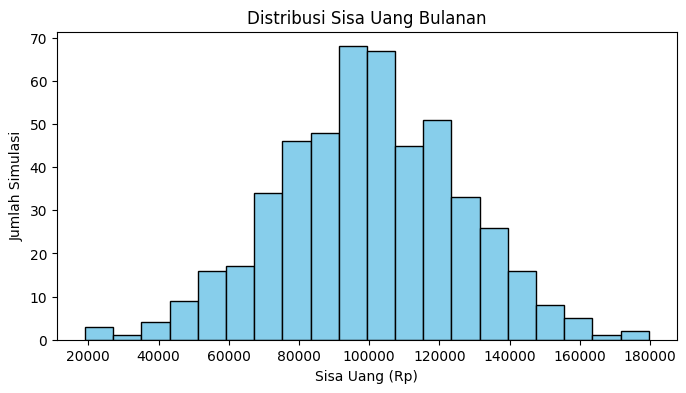

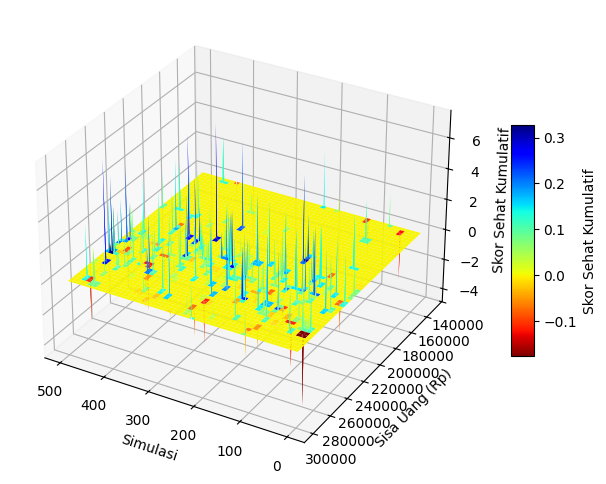

In [6]:
# Histogram sisa uang
plt.figure(figsize=(8,4))
plt.hist(sisa, bins=20, color='skyblue', edgecolor='k')
plt.xlabel('Sisa Uang (Rp)')
plt.ylabel('Jumlah Simulasi')
plt.title('Distribusi Sisa Uang Bulanan')
plt.show()

#  Plot skor sehat kumulatif
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(sampleid, bin_sisa)
surf = ax.plot_surface(X, Y, resp_sehat.T, cmap='jet_r', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Skor Sehat Kumulatif')
ax.set_xlabel('Simulasi')
ax.set_ylabel('Sisa Uang (Rp)')
ax.set_zlabel('Skor Sehat Kumulatif')
ax.view_init(elev=30, azim=120)
plt.show()

In [8]:
# Korelasi
corr = np.corrcoef(skor, sisa)[0,1]
print(f"Korelasi skor kumulatif vs sisa uang: {corr:.3f}")

Korelasi skor kumulatif vs sisa uang: -0.217


Korelasi –0.217 menunjukkan bahwa pengeluaran yang lebih tinggi tidak secara langsung menjamin pola makan lebih sehat, dan sebaliknya masih mungkin menjaga kesehatan tanpa banyak mengorbankan keuangan.